# **1.Import necessary libraries**

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# **2.Load the MNIST dataset**

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


# **3.Normalize and reshape the data**

In [3]:
# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to add a channel dimension (28, 28, 1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print the new shapes
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000, 10)
y_test shape: (10000, 10)


# **4.Define data augmentation function**

In [4]:
# Define data augmentation function
def augment_with_inversion(images, labels):
    # Invert colors of images
    inverted_images = 1.0 - images  # Images are already normalized to [0, 1]

    # Concatenate original and inverted images
    augmented_images = np.concatenate((images, inverted_images), axis=0)
    augmented_labels = np.concatenate((labels, labels), axis=0)

    return augmented_images, augmented_labels

# Augment training data
x_train_augmented, y_train_augmented = augment_with_inversion(x_train, y_train)

# **5.Initialize and build the model**

In [5]:
# Initialize the model
model = tf.keras.models.Sequential()

# Add convolutional layers
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(tf.keras.layers.Flatten())

# Add fully connected layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# **6.Train the model with augmented data**

In [6]:
# Train the model with augmented data
history = model.fit(x_train_augmented, y_train_augmented, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 107ms/step - accuracy: 0.7966 - loss: 0.6364 - val_accuracy: 0.9736 - val_loss: 0.0863
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 103ms/step - accuracy: 0.9674 - loss: 0.1087 - val_accuracy: 0.9765 - val_loss: 0.0743
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.9765 - loss: 0.0775 - val_accuracy: 0.9819 - val_loss: 0.0590
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.9811 - loss: 0.0606 - val_accuracy: 0.9852 - val_loss: 0.0494
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 101ms/step - accuracy: 0.9831 - loss: 0.0537 - val_accuracy: 0.9866 - val_loss: 0.0440
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 103ms/step - accuracy: 0.9849 - loss: 0.0471 - val_accuracy: 0.9855 - val_loss: 0.0482
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - accuracy: 0.9878 - loss: 0.0386 - val_accuracy: 0.9885 - val_loss: 0.0380
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.9895 - loss: 0

# **7.Evaluate the model on the test data**

In [7]:
# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02694227546453476
Test accuracy: 0.991599977016449


# **8.Display a random test image and its true label**

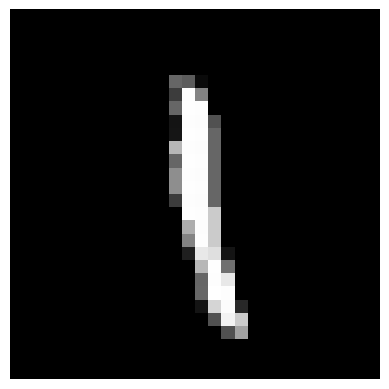

In [8]:
# Select a random test image
index = np.random.randint(0, len(x_test))
test_image = x_test[index]
true_label = np.argmax(y_test[index])

# Display the image
plt.imshow(test_image.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

# **9.Make a prediction and display the result**

In [9]:
# Make a prediction
prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(prediction)

print(f"True Label: {true_label}")
print(f"Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
True Label: 1
Predicted Label: 1


# **10.Save the model**

In [10]:
# Save the entire model to a HDF5 file
model.save('mnist_cnn_model.keras')


# **11.Test with your image**

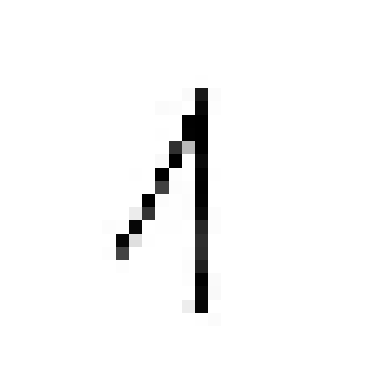

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Label: 1


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils

# Load and preprocess the image
img_path = '/content/vvtest.jpg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
test_image = image.img_to_array(img)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image.astype('float32') / 255

# Display the image
plt.imshow(test_image.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

# Make a prediction
prediction = model.predict(test_image)
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {predicted_label}")